In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### 2

In [16]:
# just some scratch work to calculate relative flux between planet and star
k = 1.3807e-16 
h = 6.6261e-27
c = 2.998e10
lambda_max_p = 1.062e-3 # use for both star and planet

def calc_rel_flux(r_star, r_p, ts, tp):
    planet_exponent = h * c/(tp * lambda_max_p * k)
    star_exponent = h * c/(ts * lambda_max_p * k)
    return ((r_p/r_star)**2) * (math.e**(star_exponent) - 1) / (math.e**(planet_exponent) - 1)

In [17]:
calc_rel_flux(6.957e10, 6.371e8, 5500, 273)

1.6500958012999558e-07

### 3

In [14]:
def planck_wavelength(lam, T):
    numerator = (2*h*c**2)/(lam**5)
    denominator = math.e**(h*c/(lam*k*T)) - 1
    return numerator/denominator

In [39]:
lams = np.linspace(912*1e-7, 1e-1, 100)
#print(lams)

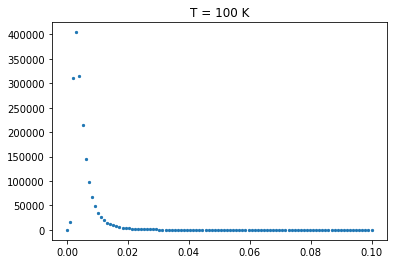

In [40]:
plt.scatter(lams, planck_wavelength(lams, 100), s=5)
plt.title('T = 100 K')
#plt.xscale('symlog')
plt.show()

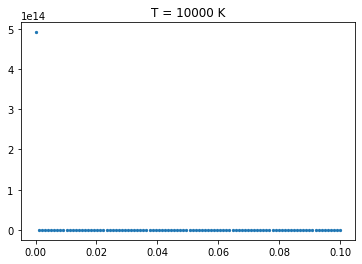

In [41]:
plt.scatter(lams, planck_wavelength(lams, 10000), s=5)
plt.title('T = 10000 K')
#plt.xscale('symlog', linthreshx=0.1)
#plt.xlim(0, 1e-5)
plt.show()